In [228]:
%load_ext autoreload
%autoreload 2
from GDS import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [154]:
gnomad_cons = pd.read_csv("~/Work/ASD_Circuits/dat/genes/gnomad.v2.1.1.lof_metrics.by_gene.txt",
                          delimiter="\t", index_col="gene")
cons_genes = set(gnomad_cons[gnomad_cons["pLI"]>0.5].index.values)
uncons_genes = set(gnomad_cons[gnomad_cons["pLI"]<0.5].index.values)

In [42]:
GeneExon = pd.read_csv("../dat/GTEx_gencode_exons.coding.csv", index_col="exon_id")
GeneExon.head(2)

/Users/jiayao/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,chr,start_pos,end_pos,strand,gene
exon_id,,,,,
ENSG00000186092.4_1,1,69091,70008,+,OR4F5
ENSG00000237683.5_1,1,137966,139379,-,AL627309.1


In [43]:
Genes = list(set(GeneExon["gene"].values))
Genes[:10]
print(len(Genes))

18071


In [44]:
lgd = pd.read_csv("../dat/gnomad.mut.1e-3.lgd.bed.gz", delimiter="\t")
lgd.head(2)

/Users/jiayao/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,#Chr,Start,End,VAR,Gene,AC,Cons
0,1,69456,69462,69456-C-CCTACA,OR4F5,2,frameshift_variant
1,1,69469,69470,69469-ACAATT-A,OR4F5,2,frameshift_variant


In [80]:
Dat = {}
for i in range(len(Genes)):
    gene = Genes[i]
    tmp_lgd = lgd[lgd["Gene"]==gene]
    tmp_exon = GeneExon[GeneExon["gene"]==gene]
    Gene_obj = GeneExonVar(gene, tmp_exon)
    Gene_obj.addVars(tmp_lgd)
    #print(i)
    #Gene_obj.ShowExons()
    Dat[gene] = Gene_obj

In [171]:
Dat["CHD8"].ShowExons()

21853350 21854338 0
21859103 21859225 0
21859619 21859804 0
21859989 21860108 0
21860663 21860971 0
21861262 21861416 0
21861632 21862357 0
21862433 21862647 0
21863068 21863281 0
21863454 21863514 0
21863973 21864054 0
21865979 21866114 0
21867758 21867867 0
21868137 21868232 0
21868307 21868493 0
21868569 21868774 0
21869031 21869233 0
21869559 21869675 0
21870113 21870298 0
21870492 21870665 0
21871173 21871374 0
21871609 21871825 0
21873365 21873626 0
21873877 21874026 1
21875012 21875194 0
21876468 21876717 0
21876860 21876987 0
21878007 21878150 6
21881069 21881158 0
21882457 21882580 0
21883094 21883155 0
21883730 21883804 2
21883881 21884069 0
21894284 21894404 0
21896025 21896416 1
21897120 21897497 0
21898957 21900020 2
21905057 21905460 0
21923105 21923305 0
21924188 21924288 0


# Mut Dist Cross length

In [158]:
step = 0.01
l = np.arange(0, 1, step) + step
density_mat = []
density_mat_cons = []
density_mat_uncons = []
for i, (k, v) in enumerate(Dat.items()):
    pos, den = v.Percentile()
    res = Percentile(pos, den, l)
    density_mat.append(res)
    if k in cons_genes:
        density_mat_cons.append(res)
    else:
        density_mat_uncons.append(res)
density_mat = np.array(density_mat)
density_mat_cons = np.array(density_mat_cons)
density_mat_uncons = np.array(density_mat_uncons)

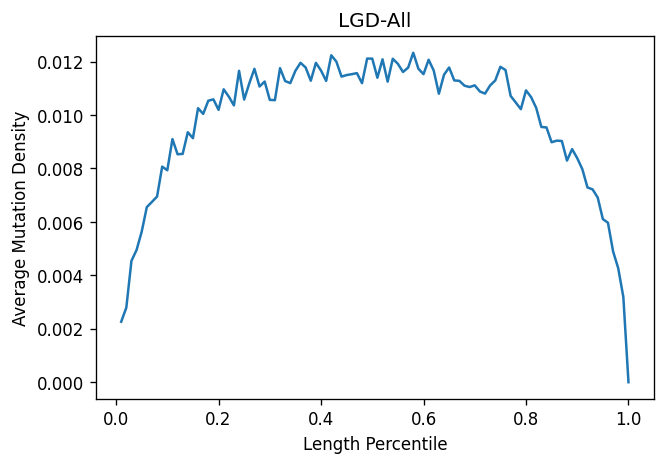

In [163]:
avg_den = np.mean(density_mat, axis=0)
plt.figure(dpi=120)
plt.plot(l, avg_den)
plt.title("LGD-All")
plt.xlabel("Length Percentile")
plt.ylabel("Average Mutation Density")
plt.show()

In [167]:
density_mat_syn = np.load("dat/syn.0.01.mat.npy")

/Users/jiayao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


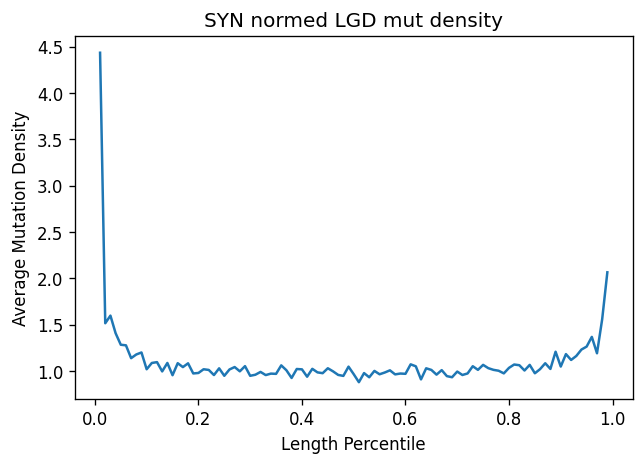

In [169]:
avg_den_syn = np.mean(density_mat_syn, axis=0)
new_den = avg_den / avg_den_syn
plt.figure(dpi=120)
plt.plot(l, new_den)
plt.title("SYN normed LGD mut density")
plt.xlabel("Length Percentile")
plt.ylabel("Average Mutation Density")
plt.show()

(4047, 100)


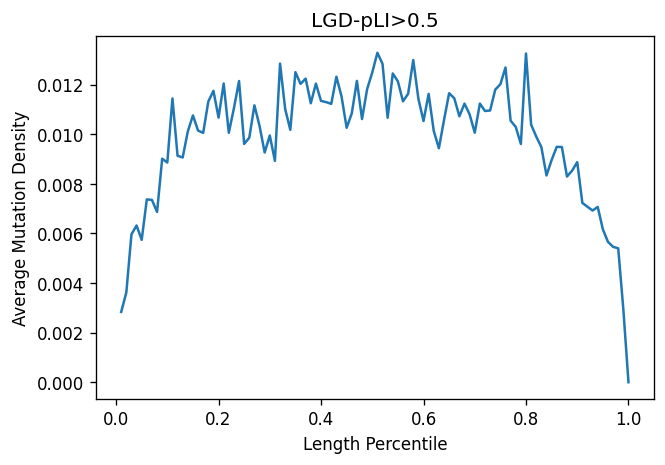

In [165]:
print(density_mat_cons.shape)
avg_den = np.mean(density_mat_cons, axis=0)
plt.figure(dpi=120)
plt.plot(l, avg_den)
plt.title("LGD-pLI>0.5")
plt.xlabel("Length Percentile")
plt.ylabel("Average Mutation Density")
plt.show()

(14024, 100)


Text(0, 0.5, 'Average Mutation Density')

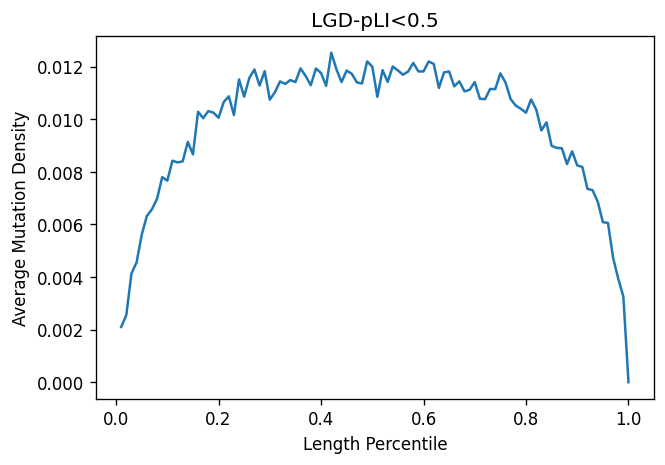

In [166]:
print(density_mat_uncons.shape)
avg_den = np.mean(density_mat_uncons, axis=0)
plt.figure(dpi=120)
plt.plot(l, avg_den)
plt.title("LGD-pLI<0.5")
plt.xlabel("Length Percentile")
plt.ylabel("Average Mutation Density")

# GDS Calculation

### Toy Example

In [178]:
x_train = [1.1, 3.2, 5.4, 7.8, 2.4] * 3
y_train = [3, 1, 0, 0, 2] * 3
res = poisson_reg(x_train, y_train)

In [179]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                   15
Model:                            GLM   Df Residuals:                       14
Model Family:                 Poisson   Df Model:                            0
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -21.184
Date:                Mon, 29 Mar 2021   Deviance:                       19.551
Time:                        03:19:37   Pearson chi2:                     24.4
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1110      0.078     -1.417      0.157      -0.265       0.043
==============================================================================
"""

### GDS

regression: log(Nmut) = a + b * x;   x:rel exp, y: N_mut; b: GDS

In [249]:
rel_exp = pd.read_csv("../dat/GTEx_v7_RNASeQCv1.1.8_exon_Tissue.RelExp.exon10-gene.csv")
rel_exp.drop("Bone Marrow", axis = 1, inplace=True)
rel_exp.head(2)

,Description,Adipose Tissue,Adrenal Gland,Bladder,Blood,Blood Vessel,Brain,Breast,Cervix Uteri,Colon,...,Salivary Gland,Skin,Small Intestine,Spleen,Stomach,Testis,Thyroid,Uterus,Vagina,Name
0,DDX11L1,-0.000762,0.006791,0.005889,-0.084778,-0.009456,0.089761,0.007947,-0.022277,0.016153,...,0.006626,-0.009320,0.014090,-0.008564,0.018013,-0.363192,-0.005577,-0.009361,-0.012050,ENSG00000223972.4_1
1,DDX11L1,0.056884,0.081083,-0.014919,0.102402,0.030828,0.226067,0.037252,0.025035,0.071738,...,0.045707,0.034178,0.056844,0.041385,0.073737,0.375379,0.070462,0.013985,0.038325,ENSG00000223972.4_2


In [255]:
gene = "CHD8"
GDS_one_gene(Dat, gene, rel_exp)

Adipose Tissue -0.15007733975912657 0.016864100480922534
Adrenal Gland -0.15935966108991434 0.013670887791477068
Bladder -0.11760261577345084 0.02628826343852363
Blood -0.18603391394773136 0.014465308421013729
Blood Vessel -0.15328984299579884 0.018528818049541443
Brain -0.1584976277826558 0.014188515797715117
Breast -0.1428436109028317 0.016742696709860592
Cervix Uteri -0.14690759579929505 0.01198085278299675
Colon -0.15218471460465538 0.013543845570321806
Esophagus -0.15408856504965532 0.01493349378713594
Fallopian Tube -0.13958613934790753 0.01320065257118183
Heart -0.24286694702320133 0.012061205148548066
Kidney -0.19136074249794832 0.011738049506751677
Liver -0.3913415810731727 0.013154261920270164
Lung -0.1475520016444981 0.01588682850746678
Muscle -0.20629003476523586 0.01841878264954546
Nerve -0.13736705629536297 0.014816675197593216
Ovary -0.13712092245116614 0.017505159755790534
Pancreas -0.29071222981578104 0.011715693465952443
Pituitary -0.15829423803344614 0.01067854625201